In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('./scalability.csv')

In [3]:
df['exp'] = df['Lib'] + ' | ' + df['Method'] + ' | ' + df['Graph']

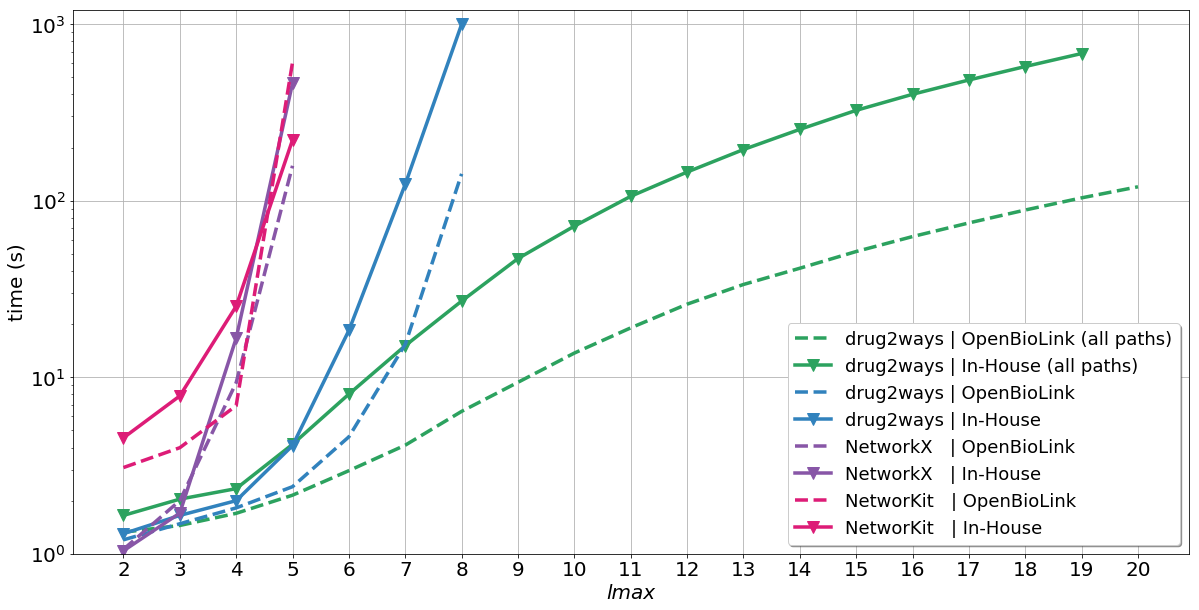

In [4]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10, forward=True)

colors = {
    'Drug2Ways': {
        'all_paths': '#2ca25f',
        'all_simple_paths': '#3182bd'
    },
    'NetworkX': {
        'all_paths': '',
        'all_simple_paths': '#8856a7'
    },
    'NetworKit': {
        'all_paths': '',
        'all_simple_paths': '#dd1c77'
    }
}

dfs = []
for lib in df['Lib'].unique():
    for method in df['Method'].unique():
        for graph in df['Graph'].unique():
    
            lib_str = 'drug2ways' if lib == 'Drug2Ways' else f'{lib}  '
            method_str = 'simple paths' if 'simple' in method else '   all paths    '
            exp = f'{lib} | {method} | {graph}'
            lmax = 5 if 'Network' in lib else 20
            exp_df = df[df.exp==exp]
            exp_df = exp_df[exp_df.lmax <= lmax]
            if exp_df.empty:
                continue
                
            color = colors[lib][method]
            ls = '--' if graph == 'OpenBioLink' else '-'
            marker = "" if ls == '--' else 'v'

            variant = '(all paths)' if 'simple' not in method_str else ''
            exp_str = f'{lib_str} | {graph}' if 'Network' in lib else f'{lib_str} | {graph} {variant}'
            exp_str = '{}'.format(exp_str)
            
            dfs.append([exp_df, exp_str, color, marker, ls])
            
for exp in dfs:
    ax.plot(exp[0].lmax, exp[0].time, label=exp[1], c=exp[2], marker=exp[3], markersize=12, ls=exp[4], linewidth=3.5)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)
    
plt.grid()
ax.set_yscale('log')
ax.set_xticks([x for x in range(2, 21)])
ax.set_xlabel("lmax", style='italic')
ax.set_ylabel('time (s)')
ax.set_ylim((1, 1200))

# ax.legend(bbox_to_anchor=(1., 1.05), fancybox=True, shadow=True, prop={'size': 14})
ax.legend(loc='best', fancybox=True, shadow=True, prop={'size': 18})
plt.show()